### Hand Written Digit Recognition Model by Alex Melocco

Custom neural network built without the use of prewritten or optimised ML libraries.

Modifiable library to create layers and adapt to any given dataset

Please see the UML diagram file for a rough architectural overview


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.activation_functions import relu, softmax, sigmoid, linear
from src.mnist_loader import MnistDataloader
from utils.mnist_util import show_image_random, show_image_with_predict
from src.init_data_path import load_file_data
import random
import matplotlib.pyplot as plt
from src.layer import DenseLayer
from src.neural_network import NeuralNetwork
from src.loss_functions import sparse_categorical_cross_entropy
import math
%matplotlib inline



#### Data Retrieval and preproccessing

Data originates from MNIST dataset (publically available dataset, see link below)

[MNIST Dataset origin](https://www.kaggle.com/datasets/hojjatk/mnist-dataset)

In [2]:
with open("variableData/training_data_info.txt", 'r') as file:
    lines = file.readlines()
training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath = load_file_data(lines)

# Load MNIST dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train_og, y_train), (x_test_og, y_test) = mnist_dataloader.load_data()

# Flatten data
x_train_length, x_test_length = len(x_train_og), len(x_test_og)
x_train = np.reshape(x_train_og, (x_train_length, -1))
x_test = np.reshape(x_test_og, (x_test_length, -1))


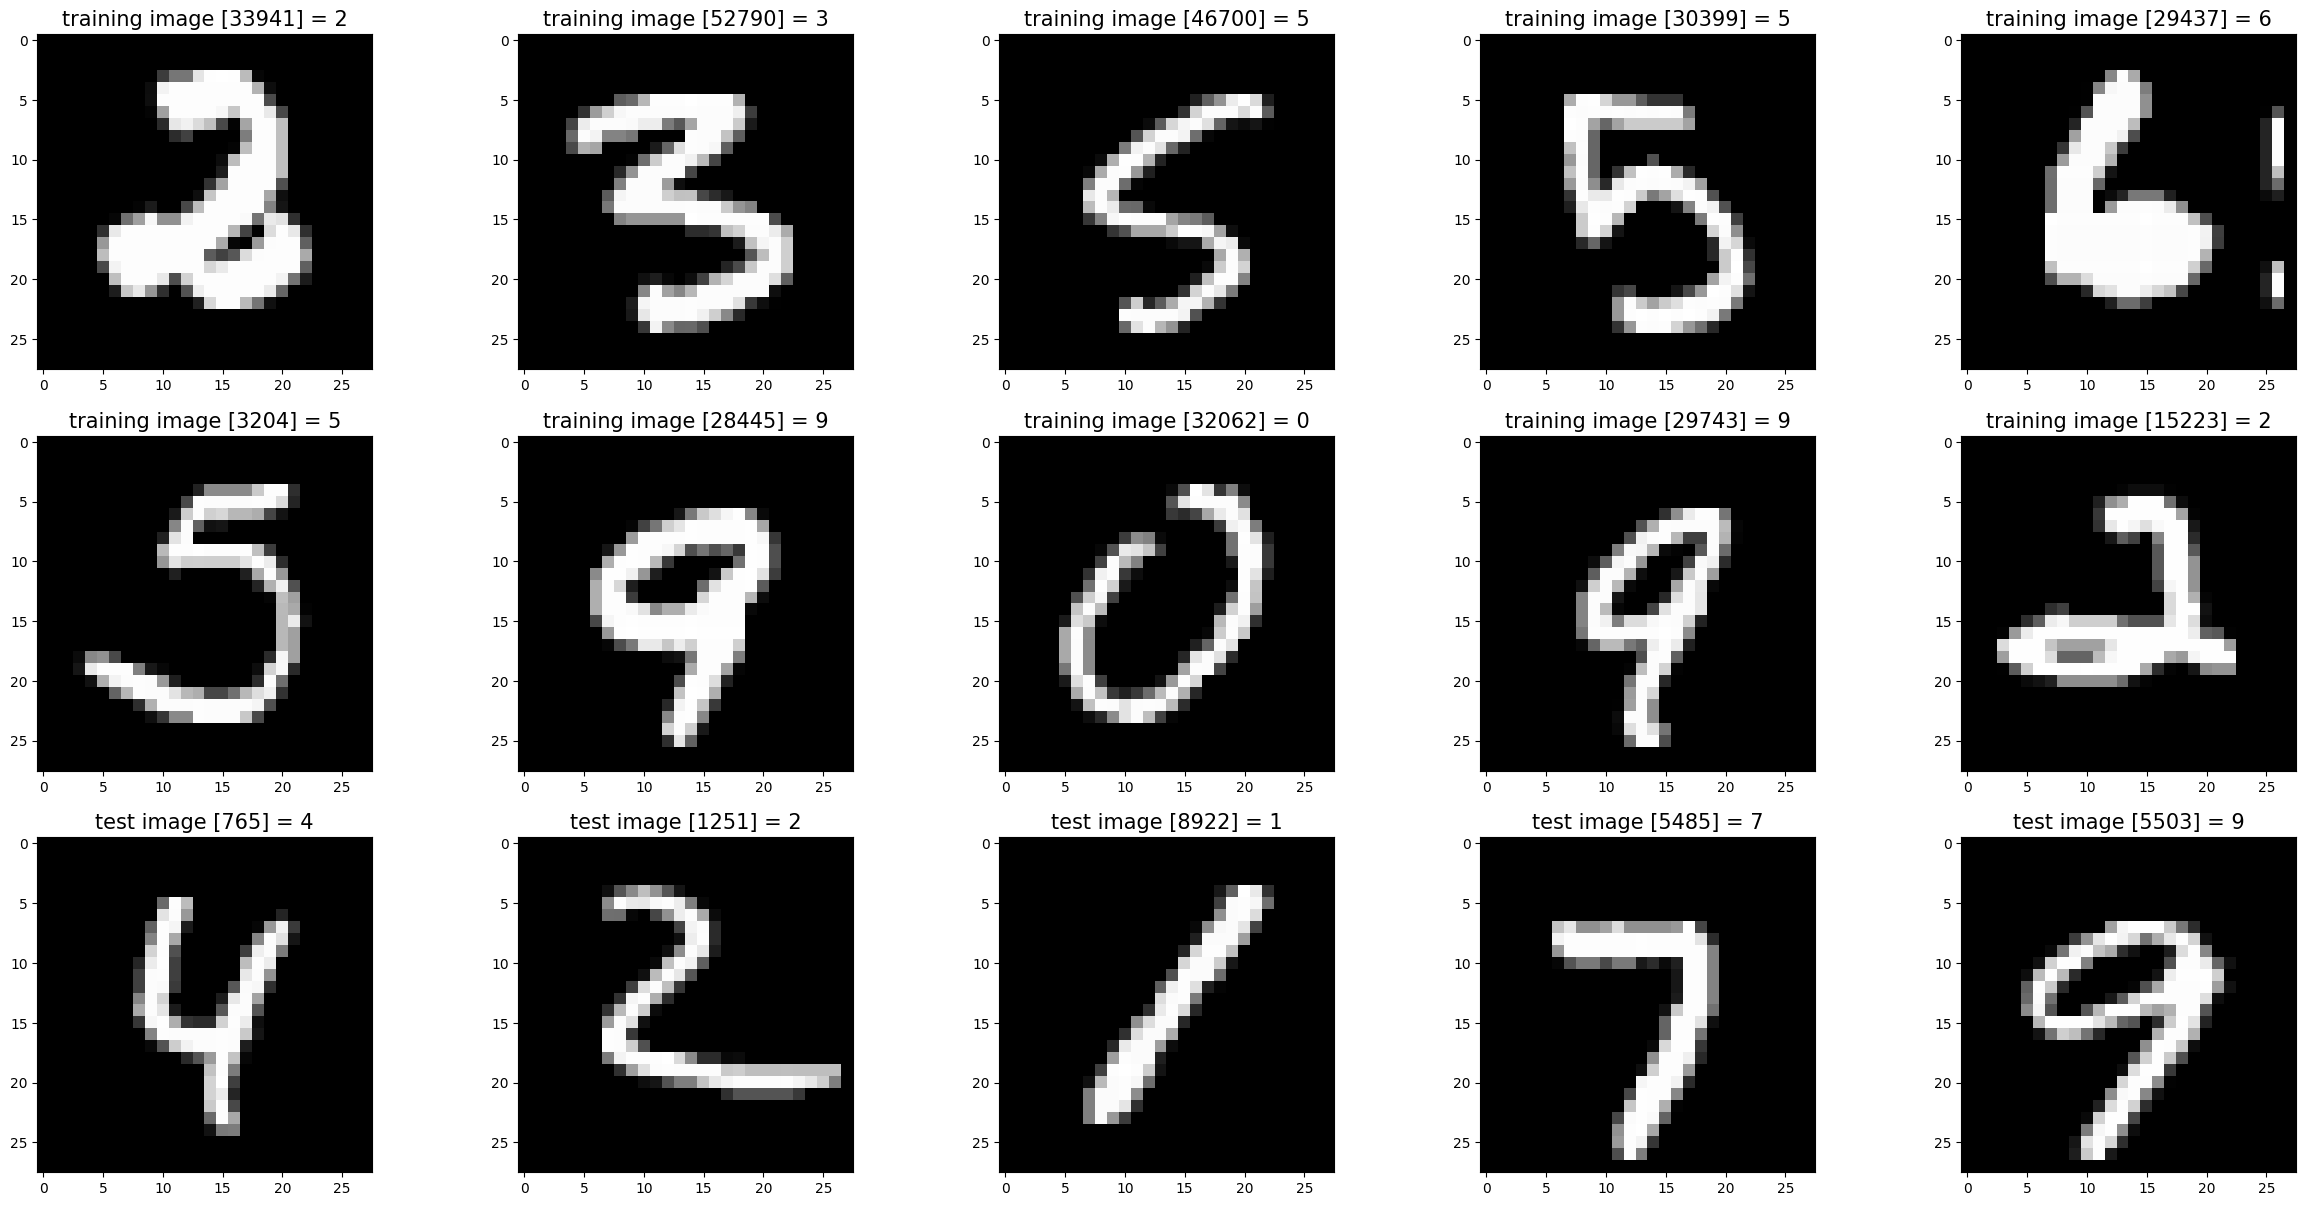

In [3]:
#
# Display examples from training and test set (labelled)
#
show_image_random(x_train_og, y_train, x_test_og, y_test)

#### Process x_train data

Noramlises data between a range of approx -3 ≤ x ≤ 3 through z-score conversion

When inputing data, please ensure normalisation prior
> Use x_train_norm as a opposed to x_train

> Use x_test_norm as a opposed to x_test

In [4]:
def z_score_normalisation(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev
    return z_scores, mean, std_dev

# Store mean/std_dev for future use (e.g. reverting)
x_train_norm, x_train_mean, x_train_std_dev = z_score_normalisation(x_train)
x_test_norm, x_test_mean, x_test_std_dev = z_score_normalisation(x_test)

# print(x_train_norm[0])

#### Network architecture plan


> Dense(units=25, activation='relu')

> Dense(units=15, activation='relu')

> Dense(units=10, activation='linear')

> **__model = Sparse Categorical Cross Entropy Cost Functions__**

Please note, that softmax conversion occurs at the output layer. The final hidden layer is made linear in the interest of reducing numerical roundoff error

In [5]:
x_train_input_size = len(x_train_norm[0]) # size of a single input

# CURRENTLY NOT INSTANCIATING ANY weight/biases - should do that later
#   - or implement a system that saves previously trained weights and biases and reloads them

layer1 = DenseLayer(input_size=x_train_input_size, output_size=25, act_fun=relu)
layer2 = DenseLayer(input_size=25, output_size=15, act_fun=relu)
layer3 = DenseLayer(input_size=15, output_size=10, act_fun=linear)

layers = [layer1, layer2, layer3]

neural_network = NeuralNetwork(layers, sparse_categorical_cross_entropy)




#### Train Neural Network

Notes
> 0.01 was too large, 0.005 to large after multiple epochs, 0.001 seems to work fine for any amount of epochs.

In [6]:
results = neural_network.train(x_train_norm, y_train, 0.001, 10)

Epoch 1/10:
60000/60000 [==============================] 100.00% Loss: [0.7832863] Time Taken: 30.44686

Epoch 2/10:
60000/60000 [==============================] 100.00% Loss: [0.33821896] Time Taken: 28.43270

Epoch 3/10:
60000/60000 [==============================] 100.00% Loss: [0.28878179] Time Taken: 21.08841

Epoch 4/10:
60000/60000 [==============================] 100.00% Loss: [0.26098264] Time Taken: 24.84474

Epoch 5/10:
60000/60000 [==============================] 100.00% Loss: [0.24100078] Time Taken: 16.96450

Epoch 6/10:
60000/60000 [==============================] 100.00% Loss: [0.22578101] Time Taken: 23.62055

Epoch 7/10:
60000/60000 [==============================] 100.00% Loss: [0.21368591] Time Taken: 17.16216

Epoch 8/10:
60000/60000 [==============================] 100.00% Loss: [0.20353312] Time Taken: 18.11374

Epoch 9/10:
60000/60000 [==============================] 100.00% Loss: [0.194777] Time Taken: 20.29030

Epoch 10/10:
60000/60000 [=======================

#### Accuracy report on test set

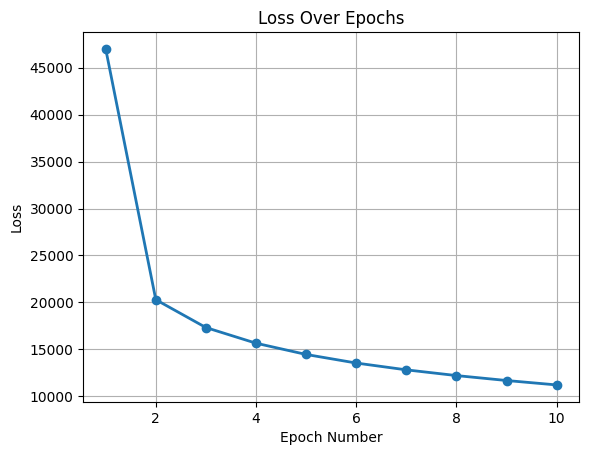

In [7]:
def plot_loss_over_epochs(loss_values):
    epoch_numbers = range(1, len(loss_values) + 1)

    # Plotting the loss over epochs
    plt.plot(epoch_numbers, loss_values, '-o', linewidth=2)
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch Number')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

plot_loss_over_epochs(results)

In [8]:
# 
# Report accuracy of given test set
# 
neural_network.test_set_accuracy(x_test_norm, y_test, print_status=True)


Model outputs 94.23% accuracy or 9423/10000


0.9423

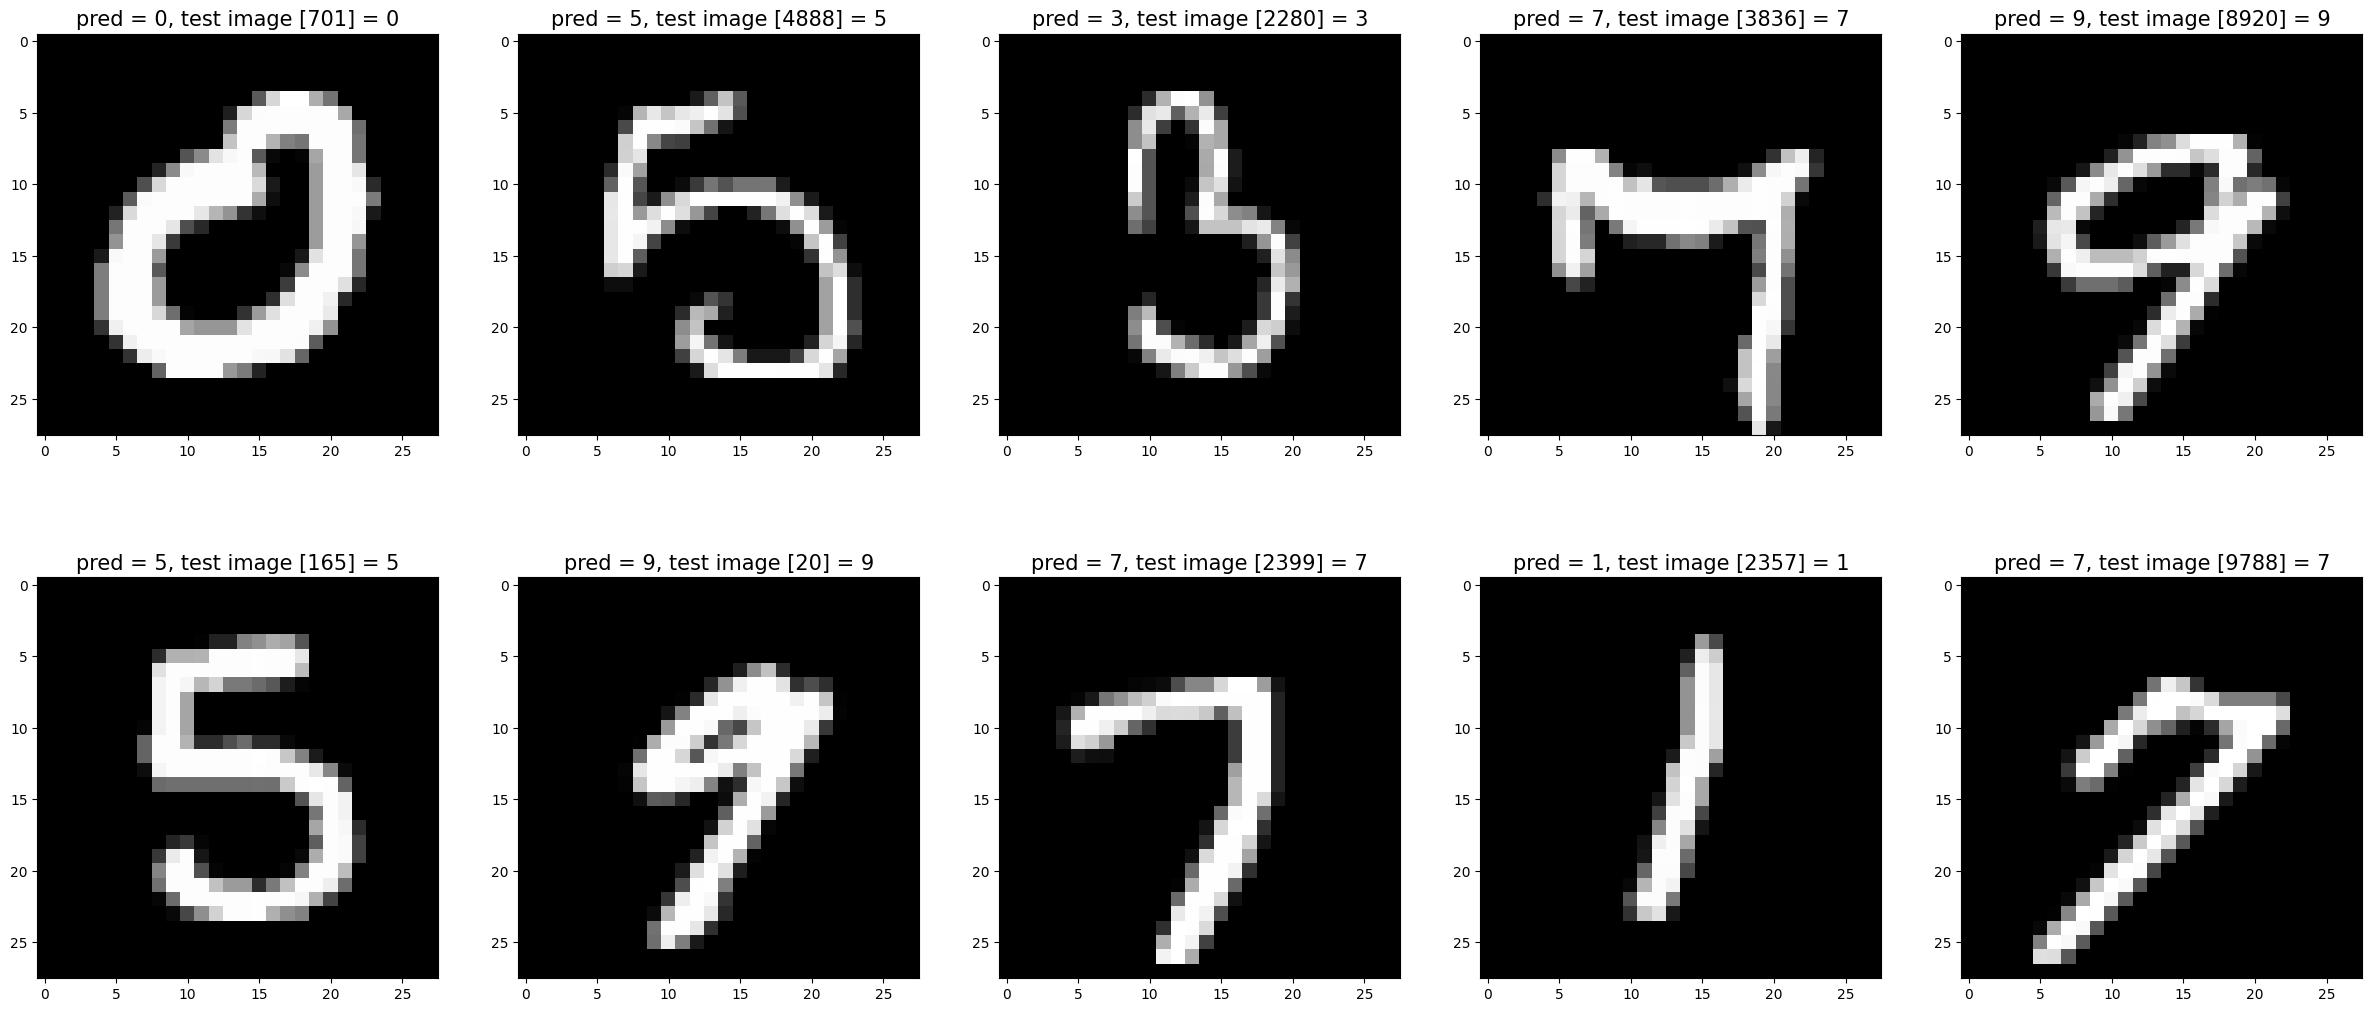

In [9]:
#
# Show some test images and predictions
#
show_image_with_predict(x_test_og, x_test_norm, y_test, neural_network)


In [10]:
# 
# Construct learning rate comparison
# 